In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T125459Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6fa6484f94d0d8393ff7cb66583ffb2deeb435c971caff731e0fa0432f231e550ce143659d7b8b571af3b57ebfed56c0f70584622d93b2cb76b4cd924d0b56bb1c57939949eadd876a45b252aa1665fb41fb10cc617c998553aaed5e5ac3614214b7f9b171506b0e0759a5394d37e539997743a68deb12f5da07dba89b69616f559bc9f337cb2625b69c981c039635ecefe527d69a51663f56eb454147d21f424d1a4e30b5c241277eead76148024dddfdc39966ffd351a3f3d327d358affe1282fe5d793c5d0e35668d9de93c397ee4b04ab31a9701615f4c7c196172939dd324fd96c081dc4574700896f3fe46a4e2568577261d1fcea9676420bf8ad926e5,pytorch-pretrained-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F255488%2F847338%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T125459Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D043f2c5eab0c8601270c40aa6fd6dec2bfa51712d63d2e34b4b3da849b09723b2904f5180c93f8b5997e058eb8e61070bfa1236a7e3049752edcf4d2d3dd46109c79d2b012a23ca8ca1143176bf0bde9a5c8815c85298f444846a51b3b96049cc2ec1945864f1d69b732f7fb123ed00d6970a95e286ecf2abc7534e2217ebd545b5e61b8b954836f5187c49337c2988a3da1497e58a172b3689375a28ceaaf3d25cfee39ad7770faa37629b3d68afe411c44c43ae36d47a894c572ede8c54a296c74ffa77ae89948638b87baec995f96aa42f4a81e585c894692a6a4d14bd9fe2dec1ada7f9c5e7742097e20b326e6e7ce19bd9559ffb9d166b12a27a631d534'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia
[==================================================] 10301285107 bytes downloaded
Downloaded and uncompressed: pytorch-pretrained-models
Data source import complete.


<h1 style="font-family:verdana;"> <center>📚 Pneumonia Detection using VGG16 Transfer Learning📚</center> </h1>
<p><center style="color:#159364; font-family:cursive;">In this notebook, I have evaluated the performance of VGG16 Architecture by fine-tuning it on <code>Chest X-Ray Images(Pneumonia)</code> Dataset.</center></p>
    <center>
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; In case this notebook is helpful to you in anyway, please do consider leaving feedback. Thanks! :)
</div></center>

***


# 🎯 VGG-16 Model
<div style="text-align:center;">
    <img  src="https://miro.medium.com/v2/resize:fit:850/1*_Lg1i7wv1pLpzp2F4MLrvw.png" />
</div>
VGG-16 is a** Convolutional Neural Network** (CNN) model proposed by Karen Simonyan and Andrew Zisserman of the Visual Geometry Group Lab of Oxford University in 2014. It's considered one of the **best vision model architectures** to date. The model won 1st and 2nd place in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014.

## 🏗️ Architecture

The architecture of VGG-16 is uniform and consists of 16 convolutional layers. Here's a detailed breakdown:

1. **📥 Input**: The input to the network is an image of dimensions (224, 224, 3).

2. **🔀 Convolutional Layers**: The first two layers have 64 channels of a 3x3 filter size and the same padding. Then, we have two layers of convolution layers of 128 filter size and filter size (3, 3). This is followed by 2 convolution layers of filter size (3, 3) and 256 filters. After that, there are 2 sets of 3 convolution layers. Each has 512 filters of (3, 3) size with the same padding.

3. **🔽 Max-Pooling Layers**: After each set of convolutional layers, there's a max-pooling layer of stride (2, 2).

4. **🔄 Activation Function**: The activation function used in the VGG-16 model is the Rectified Linear Unit (ReLU).

5. **🔗 Fully Connected Layers**: The last three layers of the VGG-16 model are fully connected layers.

6. **📤 Output**: The output of the model is a vector of 1000 values, representing the classification probability for the corresponding class.





# 📚 Import Libraries


In [3]:
!pip install scikit-image # install the correct package. skimage is part of scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 27.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
!pip install torch # install the pytorch package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install torchvision # install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 14.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
%matplotlib inline
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import skimage
from skimage import io, transform
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms

# 📂 Load Dataset

The dataset respective to already classified category is divided into three sets:
* test set
* train set
* validation set


In [9]:
EPOCHS = 30
data_dir = "../input/chest-xray-pneumonia/chest_xray/chest_xray"
TEST = 'test'
TRAIN = 'train'
VAL ='val'

# 🚀 Data Preprocessing and Augmentation

Deep learning models typically require a substantial amount of data for training. Generally, the more data available, the better the model's performance. 📈

**Image Augmentation** 🎨 is a technique used to generate new images for training our deep learning model. These new images are created using the existing training images, eliminating the need for manual collection.

In [10]:
# Define a function for data transformations
def data_transforms(phase):
    # If the phase is TRAIN
    if phase == TRAIN:
        # Compose transformations: Resize, CenterCrop, Convert to Tensor, Normalize
        transform = transforms.Compose([
            transforms.Resize(256),  # Resize the image to 256x256 pixels
            transforms.CenterCrop(224),  # Crop the center of the image to 224x224 pixels
            transforms.ToTensor(),  # Convert the image to a PyTorch Tensor
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),  # Normalize the Tensor
        ])

    # If the phase is VAL
    if phase == VAL:
        # Apply the same transformations as the TRAIN phase
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])

    # If the phase is TEST
    if phase == TEST:
        # Apply the same transformations as the TRAIN phase
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])

    return transform  # Return the composed transformations

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  # Print the device being used


cuda:0


In [11]:
# Create a dictionary of datasets for each phase (TRAIN, VAL, TEST)
# For each phase, load the images from the corresponding folder and apply the data transformations
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms(x))
                  for x in [TRAIN, VAL, TEST]}

# Create a dictionary of dataloaders for each phase
# For each phase, create a DataLoader that loads the data from the corresponding dataset
# The batch size and shuffle parameters can be adjusted as needed
dataloaders = {
    TRAIN: torch.utils.data.DataLoader(image_datasets[TRAIN], batch_size = 4, shuffle=True),
    VAL: torch.utils.data.DataLoader(image_datasets[VAL], batch_size = 1, shuffle=True),
    TEST: torch.utils.data.DataLoader(image_datasets[TEST], batch_size = 1, shuffle=True)
}


In [12]:
len(dataloaders[TRAIN])

1304

In [13]:
# Get the sizes of the datasets
dataset_sizes = {
    x: len(image_datasets[x])
    for x in [TRAIN, VAL]
}

# Get the classes from the training dataset
classes = image_datasets[TRAIN].classes

# Get the class names from the training dataset
class_names = image_datasets[TRAIN].classes


# 🖼️Visualizing the Chest X-rays

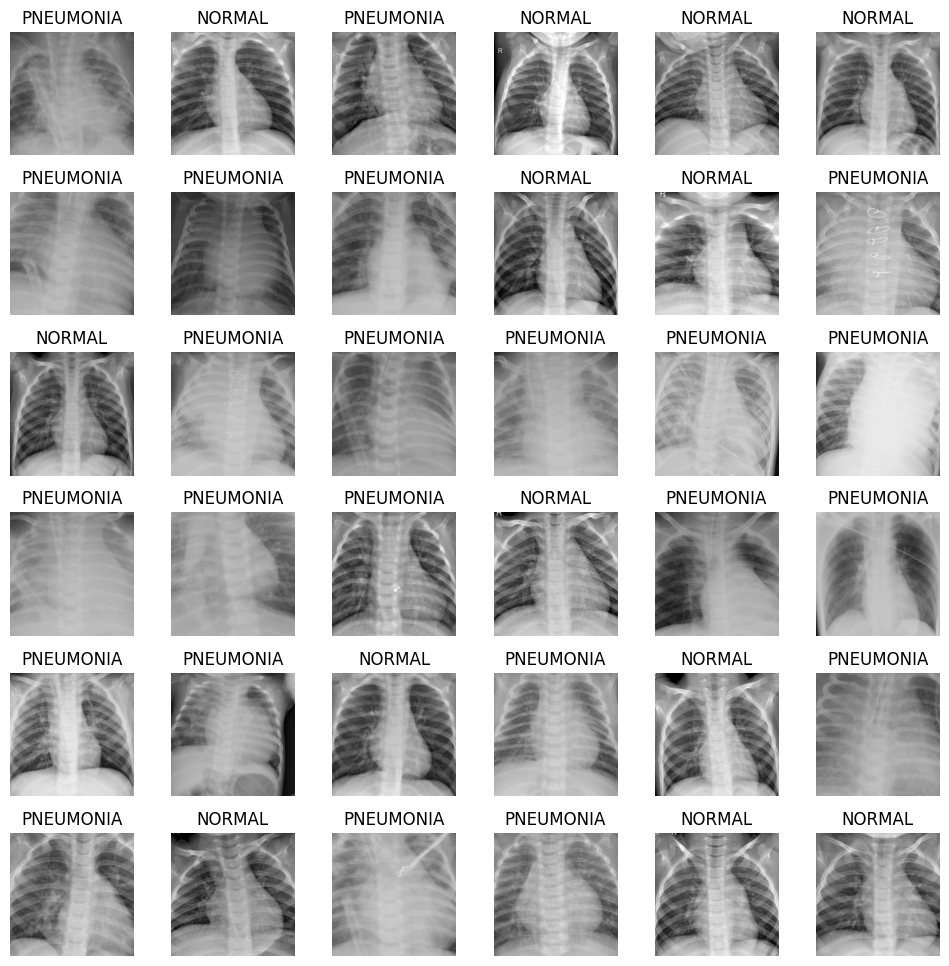

In [14]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(6):
    for j in range(6):
        inputs, classes = next(iter(dataloaders[TRAIN]))
        input_img = inputs[0]
        class_label = classes[0]
        inp = input_img.numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * inp + mean
        inp = np.clip(inp, 0, 1)
        axes[i, j].imshow(inp)
        axes[i, j].set_title(class_names[class_label.item()])
        axes[i, j].axis('off')

plt.show()


In [15]:
inputs, classes = next(iter(dataloaders[TRAIN]))

# 🚀Define Function for Training


In [17]:
import torch

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    # Variables to track the best model and best accuracy
    best_model_wts = None
    best_acc = 0.0
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluation mode

            running_loss = 0.0
            running_corrects = 0
            total_samples = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimization in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += labels.size(0)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Save loss and accuracy values
            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc)
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc)

                # Save the model if the validation accuracy improves
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = model.state_dict().copy()  # Copy the model weights

    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Save the best model weights to a file
    torch.save(model.state_dict(), 'best_model.pth')

    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history


# 🔄Load the Pretrained Model

In [18]:
model_pre = models.vgg16()
model_pre.load_state_dict(torch.load("../input/pytorch-pretrained-models/vgg16-397923af.pth"))

/tmp/ipykernel_1040/118850263.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_pre.load_state_dict(torch.load("../input/pytorch-pretrained-models/vgg16-397923af.pth

<All keys matched successfully>

In [19]:
for param in model_pre.features.parameters():
    param.required_grad = False

num_features = model_pre.classifier[6].in_features
features = list(model_pre.classifier.children())[:-1]
features.extend([nn.Linear(num_features, len(class_names))])
model_pre.classifier = nn.Sequential(*features)
print(model_pre)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 🔧Define the Hyperparameters

In [20]:
model_pre = model_pre.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pre.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# 🚂Train Phase

In [22]:
model_pre, train_loss, val_loss, train_acc, val_acc = train_model(
    model_pre,
    criterion,
    optimizer,
    exp_lr_scheduler,
    num_epochs=EPOCHS
)


Epoch 0/29
----------
train Loss: 0.1203 Acc: 0.9515
val Loss: 0.2631 Acc: 0.8750
Epoch 1/29
----------
train Loss: 0.0764 Acc: 0.9712
val Loss: 0.4857 Acc: 0.7500
Epoch 2/29
----------
train Loss: 0.0641 Acc: 0.9764
val Loss: 0.3136 Acc: 0.8125
Epoch 3/29
----------
train Loss: 0.0568 Acc: 0.9787
val Loss: 0.7975 Acc: 0.6875
Epoch 4/29
----------
train Loss: 0.0568 Acc: 0.9778
val Loss: 0.5763 Acc: 0.7500
Epoch 5/29
----------
train Loss: 0.0598 Acc: 0.9785
val Loss: 0.2688 Acc: 0.8750
Epoch 6/29
----------
train Loss: 0.0596 Acc: 0.9778
val Loss: 0.2790 Acc: 0.8750
Epoch 7/29
----------
train Loss: 0.0650 Acc: 0.9762
val Loss: 0.5306 Acc: 0.7500
Epoch 8/29
----------
train Loss: 0.0717 Acc: 0.9745
val Loss: 0.3962 Acc: 0.8750
Epoch 9/29
----------
train Loss: 0.0391 Acc: 0.9862
val Loss: 0.4722 Acc: 0.8125
Epoch 10/29
----------
train Loss: 0.0336 Acc: 0.9885
val Loss: 0.7578 Acc: 0.7500
Epoch 11/29
----------
train Loss: 0.0306 Acc: 0.9893
val Loss: 0.3900 Acc: 0.8750
Epoch 12/29
--

In [ ]:
# model_pre = train_model(model_pre, criterion, optimizer, exp_lr_scheduler, num_epochs=EPOCHS)

In [ ]:
 # save the model. The best model is already saved during training so skipping here.

#  torch.save(model_pre.state_dict(), 'pneumonia_detect_best_model.pth')


# Plot the training metrics

In [32]:
df=pd.DataFrame({"train_loss_np": train_loss_np, "val_loss_np": val_loss_np, "train_acc_np": train_acc_np, "val_acc_np": val_acc_np})
df.to_csv("training_hist.csv")

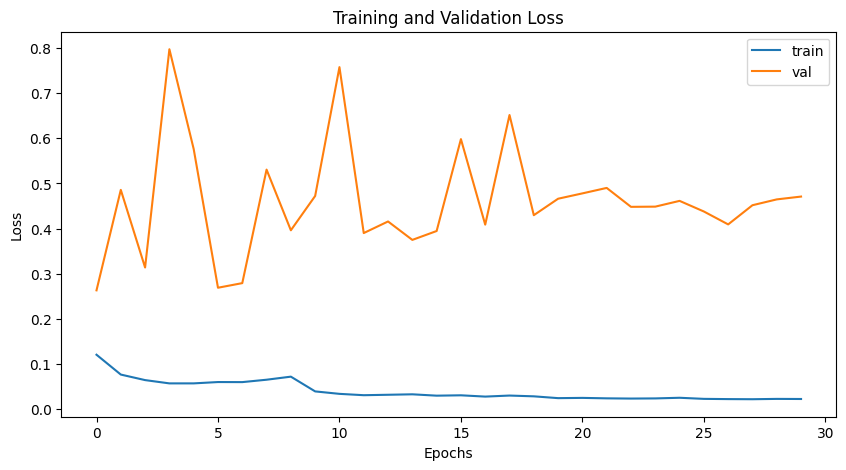

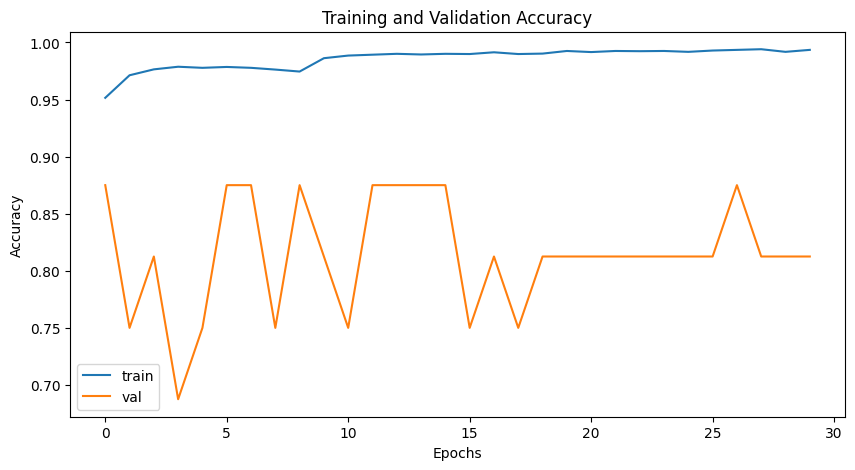

In [23]:
import matplotlib.pyplot as plt

# Convert tensors to NumPy arrays (if they are on GPU)
train_loss_np = [loss.cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in train_loss]
val_loss_np = [loss.cpu().numpy() if isinstance(loss, torch.Tensor) else loss for loss in val_loss]
train_acc_np = [acc.cpu().numpy() if isinstance(acc, torch.Tensor) else acc for acc in train_acc]
val_acc_np = [acc.cpu().numpy() if isinstance(acc, torch.Tensor) else acc for acc in val_acc]

# Plot the loss values
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(train_loss_np, label="train")
plt.plot(val_loss_np, label="val")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot the accuracy values
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy")
plt.plot(train_acc_np, label="train")
plt.plot(val_acc_np, label="val")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# 📊Evaluate Model Performance


In [24]:
def test_model():
    # Initialize counters
    running_correct = 0.0
    running_total = 0.0
    true_labels = []
    pred_labels = []
    input_images = []

    # No need to track gradients for testing
    with torch.no_grad():
        # Iterate over test data
        for data in dataloaders[TEST]:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Store true labels
            true_labels.append(labels.item())

            #Store model input images
            input_images.append(inputs)

            # Forward pass
            outputs = model_pre(inputs)
            _, preds = torch.max(outputs.data, 1)

            # Store predicted labels
            pred_labels.append(preds.item())

            # Update counters
            running_total += labels.size(0)
            running_correct += (preds == labels).sum().item()

        # Calculate accuracy
        acc = running_correct / running_total

    return true_labels, pred_labels, input_images,  running_correct, running_total, acc


# 🧪Testing Phase

In [25]:
true_labels, pred_labels, input_images, running_correct, running_total, acc = test_model()

# 📈 Results

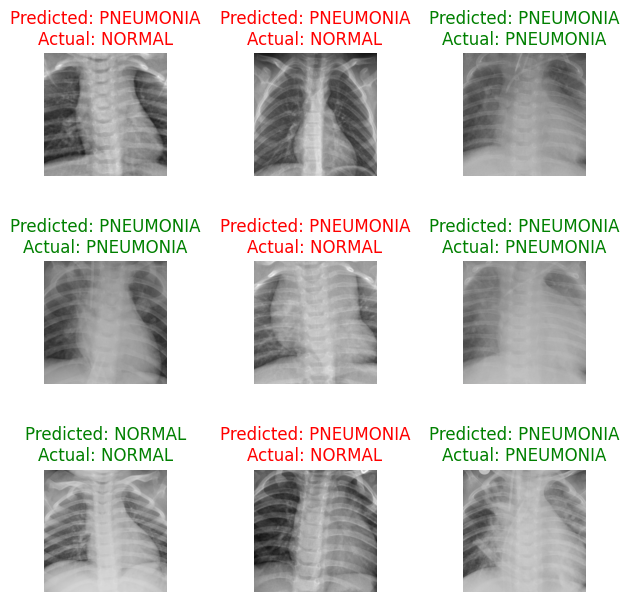

In [26]:
fig, axes = plt.subplots(3,3, figsize=(7, 7))
fig.subplots_adjust(hspace=0.7, wspace=0.7)
x=0
for i in range(3):
    for j in range(3):
        # Get the image and labels
        inp = input_images[x].squeeze()

        true_label = true_labels[x]
        pred_label = pred_labels[x]

        # Normalize the image for display
        inp = inp.cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        inp = std * inp + mean
        inp = np.clip(inp, 0, 1)

        # Display the image
        axes[i, j].imshow(inp)

        # Set the title with the predicted and actual labels
        title = "Predicted: {}\nActual: {}".format(class_names[pred_label], class_names[true_label])
        color = 'green' if pred_label == true_label else 'red'
        axes[i, j].set_title(title, color=color)

        # Hide the axes
        axes[i, j].axis('off')

        # Move to the next image
        x += 1

plt.show()


In [27]:
print("Total Correct: {} \nTotal Test Images: {}".format(running_correct, running_total))
print("Test Accuracy: ", acc)




Total Correct: 500.0 
Total Test Images: 624.0
Test Accuracy:  0.8012820512820513


Total Correct: 504.0    
Total Test Images: 624.0   
Test Accuracy:  0.8076923076923077   

# Load the best saved model from memory

In [45]:
model_pre1 = models.vgg16()  # Example: model architecture

# Modify the classifier to match the saved model (assuming 2 output classes)
num_features = model_pre1.classifier[6].in_features
model_pre1.classifier[6] = nn.Linear(num_features, 2)  # 2 output classes

model_pre1.load_state_dict(torch.load('best_model.pth'))
model_pre1 = model_pre1.to(device)


/tmp/ipykernel_1040/782817970.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_pre1.load_state_dict(torch.load('best_model.pth'))


In [46]:
def test_model1():
    # Initialize counters
    running_correct = 0.0
    running_total = 0.0
    true_labels = []
    pred_labels = []
    input_images = []

    # No need to track gradients for testing
    with torch.no_grad():
        # Iterate over test data
        for data in dataloaders[TEST]:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Store true labels
            true_labels.append(labels.item())

            #Store model input images
            input_images.append(inputs)

            # Forward pass
            outputs = model_pre1(inputs)
            _, preds = torch.max(outputs.data, 1)

            # Store predicted labels
            pred_labels.append(preds.item())

            # Update counters
            running_total += labels.size(0)
            running_correct += (preds == labels).sum().item()

        # Calculate accuracy
        acc = running_correct / running_total

    return true_labels, pred_labels, input_images,  running_correct, running_total, acc


true_labels1, pred_labels1, input_images1, running_correct1, running_total1, acc1 = test_model1()

In [63]:
print("running_total1:", running_total1, "acc1:", acc1)

df1 = pd.DataFrame({"true_labels1": true_labels1, "pred_labels1": pred_labels1})

df1

running_total1: 624.0 acc1: 0.8012820512820513


,true_labels1,pred_labels1
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
619,0,0
620,0,0
621,0,1
622,1,1
